<a href="https://colab.research.google.com/github/Maurilio-Neto/Imersao_Alura_dados_em_python/blob/main/Imers%C3%A3o_dados_python_Alura_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Análise de dados com Pandas


In [1]:
import pandas as pd
# Importando uma biblioteca e atribuindo um nome para ela no meu código.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv"
    )
# Novo bloco de código para importação da base de dados (df: data frame).

In [3]:
df.head()
# Visualização do data frame (df) leitura das primeiras linhas do df, é possível
# indicar quantas linhas desejamos ver dentro do parênteses.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()
# Mostra algumas informações das colunas do df, como nome, tipo de variável,
# etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()
# Mostra medidas estatísticas descritivas das variáveis, como média, quartis,
# desvio padrão, amplitude e nº de oservações.

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape
# (nº linhas, nº colunas)
# o valor abaixo é tratado como um vetor, assim como no R, em que o primeiro
# valor é o numero de linhas e o segundo o número de colunas.

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
# Cria duas variáveis de acordo com o vetor do df.shape (133349, 11), ou seja,
# linhas = 1º valor do vetor df.shape
# colunas = 2º valor do vetor df.shape
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [8]:
df.columns
# Mostra os nomes das colunas.

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
# Define uma nova variável que possui um conjunto de nome definidos e depois é
# utilizada na função .rename para substituir os nomes indicados pelos nomes
# definidos.

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
df["senioridade"].value_counts()
# Comando para contar as frequências de cada categoria de uma coluna do data
# frame
# Legenda:
# SE: Sênior
# MI: Mid (Pleno)
# EN: Entry (Júnior)
# EX: Executive (Executivo)

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [12]:
df["contrato"].value_counts()
# Legenda:
# FT: Full Time (Tempo integral)
# CT: Temporary contract (Contrato)
# PT: Part time (Tempo parcial)
# FL: Freelance

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
contrato = {
    'FT': 'Tempo integral',
    'CT': 'Contrato',
    'PT': 'Tempo parcial',
    'FL': 'Freelance'
}

df["contrato"] = df["contrato"].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo integral,132563
Contrato,394
Tempo parcial,376
Freelance,16


In [14]:
df["remoto"].value_counts()
# Legenda
# 0: Trabalhos presenciais
# 100: Remoto
# 50: Híbrido


,count
remoto,
0,105312
100,27718
50,319


In [15]:
remoto = {
    0: 'Trabalhos presenciais',
    100: 'Remoto',
    50: 'Híbrido'
}

df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

,count
remoto,
Trabalhos presenciais,105312
Remoto,27718
Híbrido,319


In [16]:
df["tamanho_empresa"].value_counts()
# Legenda
# M: Medium
# L: Large
# S: Small

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [17]:
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [18]:
df["cargo"].value_counts()

,count
cargo,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo integral,Data Scientist,USD,US,Trabalhos presenciais,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Preparação e limpeza dos dados

In [22]:
df.isnull()
# Procurando dados nulos, "False" indicada que a célula não contém dado nulo
# "True" indica a presença de dado nulo.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()
# Comando para somar a quantidade de dados nulos dentro do df (data frame),
# existem 10 células vazias na coluna ano.

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [24]:
df['ano'].unique()
# Demonstra os valores únicos dentro da coluna ano, então sabemos que existem
# os seguintes valores: 2020, 2021, 2022, 2023, 2024, 2025 e nan (not a number).

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]
# É um comando que filtra dentro do df as linhas com os valores nulos

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo integral,Product Manager,184500,USD,184500,US,Trabalhos presenciais,US,Médio
59692,NaN,Pleno,Tempo integral,Engineer,110000,USD,110000,DE,Trabalhos presenciais,DE,Médio
59710,NaN,Júnior,Tempo integral,Data Scientist,208800,USD,208800,US,Trabalhos presenciais,US,Médio
59759,NaN,Sênior,Tempo integral,Software Engineer,135000,USD,135000,US,Trabalhos presenciais,US,Médio
59789,NaN,Sênior,Tempo integral,Engineer,112000,USD,112000,US,Trabalhos presenciais,US,Médio
131000,NaN,Sênior,Tempo integral,Machine Learning Engineer,163800,USD,163800,US,Trabalhos presenciais,US,Médio
131006,NaN,Sênior,Tempo integral,Data Analytics Manager,204500,USD,204500,US,Trabalhos presenciais,US,Médio
133054,NaN,Júnior,Tempo integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [26]:
# Para dados nulos, existem 3 possíveis ações
# 1ª: Exclusão da observação toda
# 2ª: Adicionar informção
# 3ª: Imputação de dados com base em critérios (recomendada)

In [27]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario' : [4000, np.nan, 5000, np.nan, 100000]
    })

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [28]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
# ffill = foward fill (preencha adiante), indicando que o dado nulo deve assumir
# o valor da célula anterior.

df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
# bfill = backward fill (preencha retrocedendo), indicando que o dado nulo deve
# assumir o valor da célula anterior.

df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [30]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [31]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype(np.int64))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


# Aula 3 - Gráficos e visualização de dados

In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


<Axes: title={'center': 'Frequências absolutas de senioridade'}, xlabel='senioridade'>

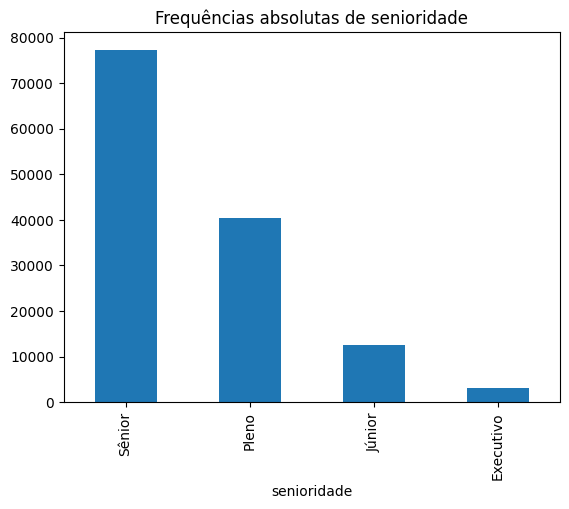

In [36]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Frequências absolutas de senioridade")
# Gráfico pela biblioteca pandas.

In [37]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

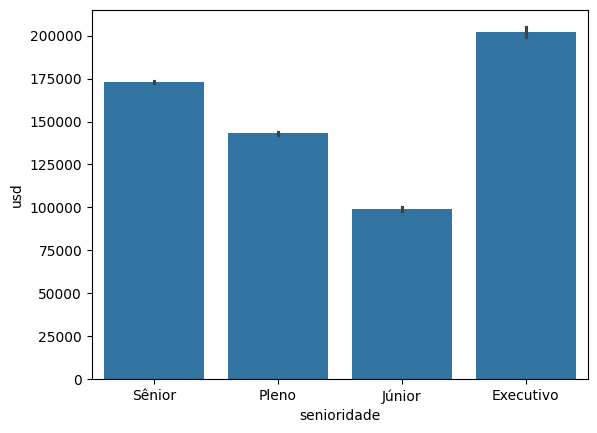

In [38]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')
# Gráfico pela biblioteca seaborn, definindo um conjunto de dados, o eixo x e y.

In [39]:
import matplotlib.pyplot as plt

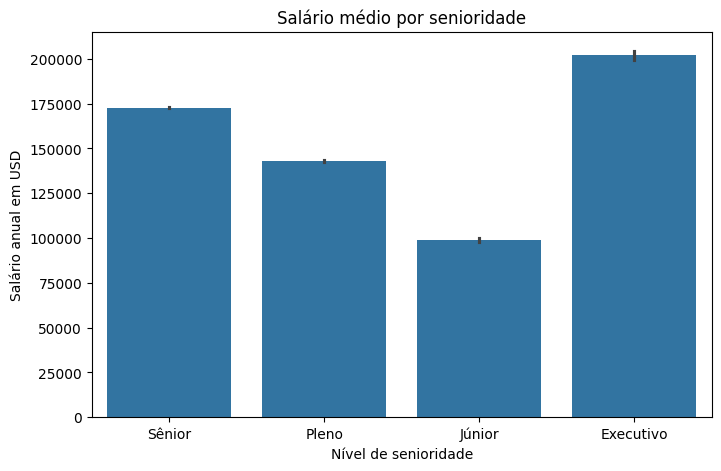

In [40]:
plt.figure(figsize=(8, 5)) #1
sns.barplot(data=df_limpo, x='senioridade', y='usd') #2
plt.title('Salário médio por senioridade') #3
plt.xlabel('Nível de senioridade') #4
plt.ylabel('Salário anual em USD') #5
plt.show() #6
# 1: Definir o tamanho da figura.
# 2: Definir os dados do gráfico, de onde ele tira a informação e quais
# informções estão contidas em cada eixo.
# 3: Definir o título do gráfico.
# 4: Rótulo/título do eixo x.
# 5: Rótulo/título do eixo y.
# 6: Plotar e mostrar a figura.

In [41]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [42]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

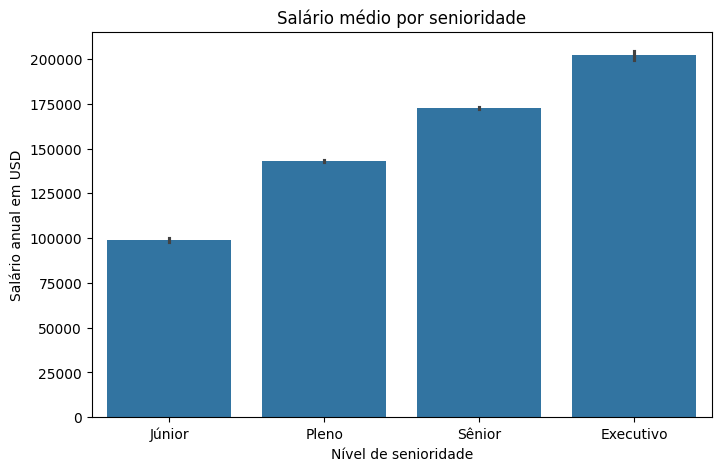

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário anual em USD')
plt.show()

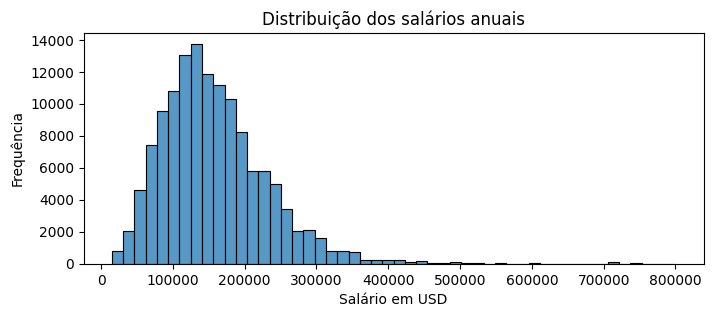

In [44]:
plt.figure(figsize=(8, 3))
sns.histplot(df_limpo['usd'], bins=50, kde=False)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

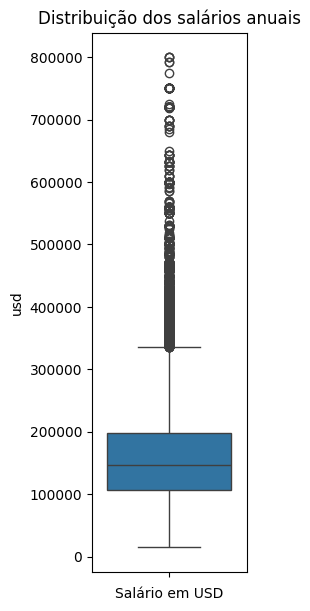

In [45]:
plt.figure(figsize=(2, 7))
sns.boxplot(y=df_limpo['usd'])
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.show()

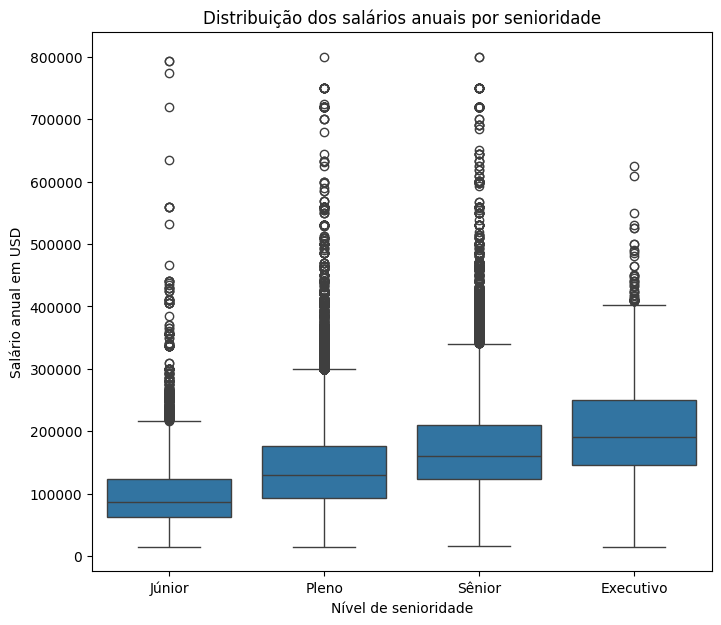

In [46]:
plt.figure(figsize=(8, 7))
sns.boxplot(y=df_limpo['usd'], x=df_limpo['senioridade'], order=ordem)
plt.title('Distribuição dos salários anuais por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário anual em USD')
plt.show()

# ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

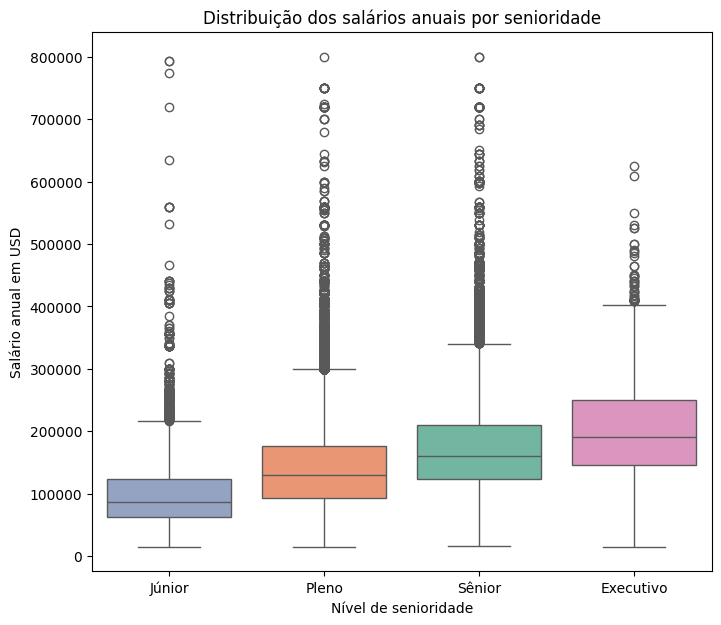

In [47]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=df_limpo, y='usd', x='senioridade', order=ordem, palette='Set2', hue='senioridade')
plt.title('Distribuição dos salários anuais por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário anual em USD')
plt.show()

In [72]:
import plotly.express as px

In [49]:
df_senioridade_usd = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Sort the DataFrame by 'usd' in ascending order
df_senioridade_usd = df_senioridade_usd.sort_values(by='usd', ascending=True)

fig = px.bar(
    df_senioridade_usd,
    x='senioridade',
    y='usd',
    title='Média salarial por categoria de senioridade (Ordenado)',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Anual em USD'},
    color='senioridade'
)

fig.show()

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'contagem']

fig = px.pie(
    remoto_contagem,
    values='contagem',
    names='tipo_trabalho',
    title='Proporção de tipos de trabalho'
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [51]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [58]:
# Desafio da última aula: criar um gráfico interativo do salário de data scientists agrupado por países.

# Vou criar um data frame com as colunas cargos, salario e residencia.

df_cargo = df_limpo[['cargo', 'usd', 'residencia']]
df_cargo.head(10)

,cargo,usd,residencia
0,Solutions Engineer,214000,US
1,Solutions Engineer,136000,US
2,Data Engineer,158800,AU
3,Data Engineer,139200,AU
4,Data Engineer,90000,US
5,Data Engineer,80000,US
6,Data Scientist,185000,US
7,Data Scientist,148000,US
8,Data Scientist,135000,CA
9,Data Scientist,108000,CA


In [71]:
# Agora vou criar um novo data frame filtrando somente as informações dos "Data Scientist".

df_data_scientist = df_cargo[df_cargo['cargo'] == 'Data Scientist'][['residencia', 'usd']].reset_index(drop=True)

df_data_scientist.head()
# Cada linha é um Data Scientist em um país de resiência e com um salário em USD.

,residencia,usd
0,US,185000
1,US,148000
2,CA,135000
3,CA,108000
4,US,258000


In [74]:
fig = px.box(df_data_scientist, x='residencia', y='usd',
             title='Distribuição de Salários de Data Scientists por País',
             labels={'residencia': 'País de Residência', 'usd': 'Salário Anual em USD'},
             color='residencia') # Adiciona cores individuais para cada residência

# Altera a escala do eixo Y (salário), por exemplo, de 0 a 400.000
# fig.update_yaxes(range=[0, 400000])

fig.show()